# <span style="color:pink">**Car Price Prediction with Linear Regression**</span>

## **Libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **Reading data**

In [21]:
df = pd.read_csv('../Final_Project/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



## **Set features and target**

In [22]:
features = df[["enginesize", "horsepower", "citympg", "highwaympg", "fueltype"]].copy()
target = df["price"].copy()
print(features.head())
print("*" * 100)
print(target.head())

   enginesize  horsepower  citympg  highwaympg fueltype
0         130         111       21          27      gas
1         130         111       21          27      gas
2         152         154       19          26      gas
3         109         102       24          30      gas
4         136         115       18          22      gas
****************************************************************************************************
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64



## **Convert categorical value to numerical value**

In [23]:
features["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [24]:
features["fueltype"] = features["fueltype"].map({"gas": 0, "diesel": 1}).astype(int)

features["fueltype"].unique()

array([0, 1])


## <span style="color:yellow">**Simple Linear regression**</span>

### *Normalize x and y to be in a range(0, 1)*

In [25]:
def normalize(x, y):
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()

    x_scaled = (x - x_min) / (x_max - x_min)
    y_scaled = (y - y_min) / (y_max - y_min)

    return x_scaled, y_scaled, x_max, x_min, y_max, y_min

### *Gradient Descent Algorithm*

In [26]:
def gradient_descent(x_scaled, y_scaled):
    w = 0
    b = 0
    learning_rate = 0.2
    eps = 1e-10
    epochs = 10000
    samples = len(x_scaled)
    it = 0
    error_history = []
    for _ in range(epochs):
        y_pred = w * x_scaled + b
        error = (y_scaled - y_pred)

        dw = -np.sum(error * x_scaled) / samples
        db = -np.sum(error) / samples

        if abs(learning_rate * dw) < eps and abs(learning_rate * db) < eps:
            break

        w -= learning_rate * dw
        b -= learning_rate * db

        # print(w)
        # print(b)

        sum_error = (1/(2*samples)) * np.sum(error ** 2)
        error_history.append(sum_error)
        it += 1

    return w, b, it, error_history

### *Convert weight and bias to original scale*

In [27]:
def convert_to_original_scale(w, b, x_max, x_min, y_max, y_min):
    w_convert = w * (y_max - y_min)/(x_max - x_min)
    b_convert = (y_max - y_min) * b - w_convert * x_min + y_min

    return w_convert, b_convert

### *Simple linear regression on each feature*

****************************************************************************************************
Features: enginesize
R-squared (R2): 0.764
MSE: 14980261.406
Scaled w: 1.103224255829472
Scaled b: -0.07183957870629781
True w: 167.69841310687846
True b: -8005.4451089666745


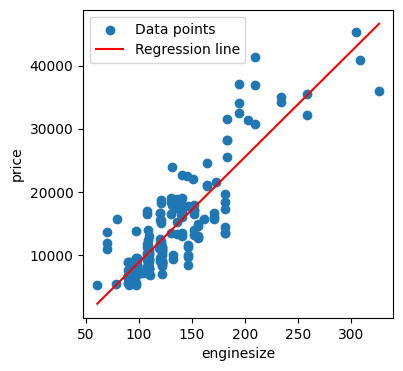

****************************************************************************************************
Features: horsepower
R-squared (R2): 0.653
MSE: 22032509.702
Scaled w: 0.9727206654898997
Scaled b: -0.02490279477938499
True w: 163.2630576969339
True b: -3721.7611487560134


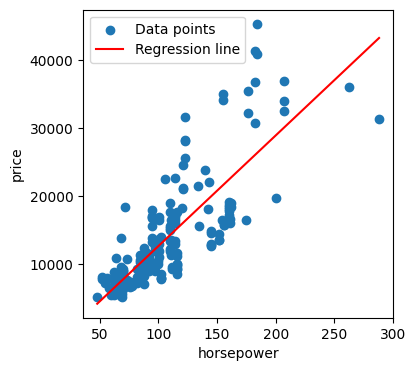

****************************************************************************************************
Features: citympg
R-squared (R2): 0.470
MSE: 33644342.550
Scaled w: -0.7483806990188507
Scaled b: 0.4565633880443092
True w: -837.3964254965929
True b: 34395.439928656575


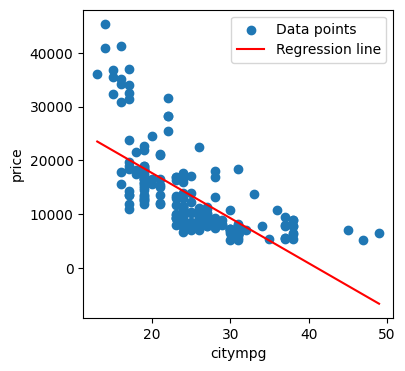

****************************************************************************************************
Features: highwaympg
R-squared (R2): 0.487
MSE: 32603432.049
Scaled w: -0.763427669015425
Scaled b: 0.49889483510282867
True w: -809.2735095599829
True b: 38162.85790057187


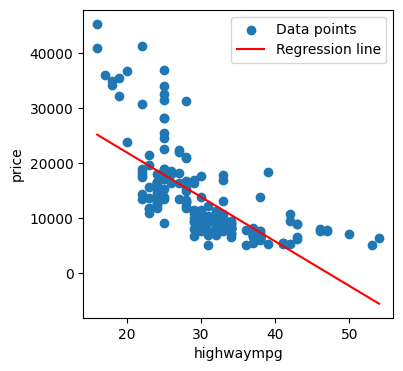

****************************************************************************************************
Features: fueltype
R-squared (R2): 0.011
MSE: 62801141.647
Scaled w: 0.07046203191417505
Scaled b: 0.19566551374378527
True w: 2838.3515695667993
True b: 12999.798224627159


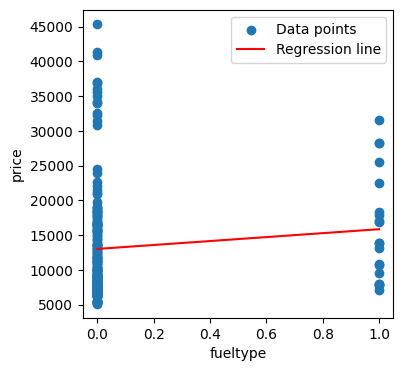

In [28]:
R2s = []
MSEs = []

for feature in features:
    x = features[feature].values
    y = target.values
    
    x_scaled, y_scaled, x_max, x_min, y_max, y_min = normalize(x, y)
    w_scaled, b_scaled, it, error_history = gradient_descent(x_scaled, y_scaled)

    true_w, true_b = convert_to_original_scale(w_scaled, b_scaled, x_max, x_min, y_max, y_min)

    # Measure performance
    # - Note: R^2 = (sum(actual - predict)^2) / (sum(actual - mean) ** 2)
    # - Note: MSE = (sum(actual - predict) ** 2) / samples
    y_pred = true_w * x + true_b
    MSE = np.mean((y - y_pred) ** 2)
    R2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

    MSEs.append(MSE)
    R2s.append(R2)

    print("*"*100)
    print(f"Features: {feature}")
    print(f"R-squared (R2): {R2:.3f}")
    print(f"MSE: {MSE:.3f}")
    print(f"Scaled w: {w_scaled}")
    print(f"Scaled b: {b_scaled}")
    print(f"True w: {true_w}")
    print(f"True b: {true_b}")

    x_plot = np.linspace(x_min, x_max, 100)
    
    plt.figure(figsize=(4,4))
    plt.scatter(x, y, label="Data points")
    plt.plot(x_plot, true_w * x_plot + true_b, label="Regression line", color="red")
    plt.xlabel(feature)
    plt.ylabel("price")
    plt.legend()
    plt.show()




## <span style="color:Aqua">**Multiple linear regression**</span>

In [29]:
features.head()

,enginesize,horsepower,citympg,highwaympg,fueltype
0,130,111,21,27,0
1,130,111,21,27,0
2,152,154,19,26,0
3,109,102,24,30,0
4,136,115,18,22,0


In [30]:
x_multi = features.values
y = target.values

print(f"multi features value:\n{x_multi[:5]}")
print(f"y-value:\n{y[:5]}")

multi features value:
[[130 111  21  27   0]
 [130 111  21  27   0]
 [152 154  19  26   0]
 [109 102  24  30   0]
 [136 115  18  22   0]]
y-value:
[13495. 16500. 16500. 13950. 17450.]


### *Normalize data to be in a range(0, 1)*

In [31]:
x_multi_min = x_multi.min(axis=0)
x_multi_max = x_multi.max(axis=0)
y_min = y.min()
y_max = y.max()

x_multi_scaled = (x_multi - x_multi_min) / (x_multi_max - x_multi_min)
y_scaled = (y - y_min) / (y_max - y_min)

y_scaled = y_scaled.reshape(-1, 1)

print(f"x_mult_scaled:\n{x_multi_scaled[:5]}")
print(f"y_scaled:\n{y_scaled[:5]}")

x_mult_scaled:
[[0.26037736 0.2625     0.22222222 0.28947368 0.        ]
 [0.26037736 0.2625     0.22222222 0.28947368 0.        ]
 [0.34339623 0.44166667 0.16666667 0.26315789 0.        ]
 [0.18113208 0.225      0.30555556 0.36842105 0.        ]
 [0.28301887 0.27916667 0.13888889 0.15789474 0.        ]]
y_scaled:
[[0.20795889]
 [0.28255797]
 [0.28255797]
 [0.21925426]
 [0.3061417 ]]


### *Add bias column*
Because in an original matrix we only have the data of each features without bias.<br>
So, to retrieve bias value from calculaions, we will add column of 1s to our matrix

In [32]:
x_multi_scaled = np.hstack((np.ones((x_multi_scaled.shape[0], 1)), x_multi_scaled)) # Add bias column
print(f"x_mult_scaled:\n{x_multi_scaled[:5]}")

x_mult_scaled:
[[1.         0.26037736 0.2625     0.22222222 0.28947368 0.        ]
 [1.         0.26037736 0.2625     0.22222222 0.28947368 0.        ]
 [1.         0.34339623 0.44166667 0.16666667 0.26315789 0.        ]
 [1.         0.18113208 0.225      0.30555556 0.36842105 0.        ]
 [1.         0.28301887 0.27916667 0.13888889 0.15789474 0.        ]]


### *Initilize coefficient as a column vector of 0*

In [33]:
coeffs = np.zeros((x_multi_scaled.shape[1], 1))
print(f"coeffs:\n{coeffs}")

coeffs:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### *Gradient Descent Algorithm*

In [34]:
learning_rate = 0.1
eps = 1e-9
epochs = 10000
samples = len(x_multi_scaled)
error_history_multi_f = []
it = 0
for _ in range(epochs):
    prediction = np.dot(x_multi_scaled, coeffs)
    error = prediction - y_scaled
    gradient = (1/samples) * np.dot(x_multi_scaled.T, error) # how off is the features on average
    coeffs -= learning_rate * gradient # Update coeffs using that gradient

    mean_error = float(np.mean(error**2))
    error_history_multi_f.append(mean_error)
    it += 1
    if abs(error_history_multi_f[_] - error_history_multi_f[_-1]) < eps and _ > 2:
        break

coeffs = coeffs.flatten()
print(f"Iterations: {it}")
print("Final coeffs values:", coeffs)
# error_history_multi_f[:5]

Iterations: 6172
Final coeffs values: [ 0.00361309  0.67063853  0.34586128 -0.0862507  -0.07513138  0.09951328]


### *Convert coefficients and bias back to the original scale*

In [35]:
true_coeffs = coeffs[1:] * (y_max - y_min) / (x_multi_max - x_multi_min)
true_bias = y_min + (y_max - y_min) * (coeffs[0] - np.sum((coeffs[1:] * x_multi_min) / (x_multi_max - x_multi_min)))

print("Coeffs from gradient descent:", true_coeffs)
print("Bias from gradient descent:", true_bias)

Coeffs from gradient descent: [ 101.94211857   58.04993434  -96.50974088  -79.64322176 4008.5938959 ]
Bias from gradient descent: -1212.4055129841681


### *Measure performance*

In [36]:
y_pred = np.dot(x_multi, true_coeffs) + true_bias
MSE = np.mean((y - y_pred) ** 2)
R2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
MSEs.append(MSE)
R2s.append(R2)

print(f"R-squared (R2): {R2:.3f}")
print(f"MSE: {MSE:.3f}")

R-squared (R2): 0.815
MSE: 11748617.470


In [37]:
columns = [''] + [feature for feature in features] + ['mix']
row_1 = ["R2"] + [f"{R2:.3f}" for R2 in R2s]
row_2 = ["MSE"] + [f"{MSE:.3f}" for MSE in MSEs]
df = pd.DataFrame([row_1, row_2], columns=columns)
print("Performance:")
df.head()

Performance:


,,enginesize,horsepower,citympg,highwaympg,fueltype,mix
0,R2,0.764,0.653,0.470,0.487,0.011,0.815
1,MSE,14980261.406,22032509.702,33644342.550,32603432.049,62801141.647,11748617.470


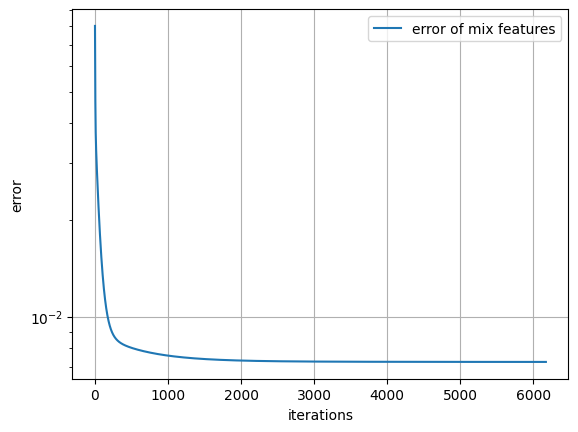

In [38]:
x_p = np.arange(len(error_history_multi_f))
plt.plot(x_p, error_history_multi_f, label="error of mix features")
plt.xlabel("iterations")
plt.ylabel("error")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()